
# EDA of Oracle's Elixir League of Legends 2024 Match Data

### Data Description:
Comprehensive dataset of all professional level games of League of Legends maintained by Oracle's Elixir. This data contains practically all possible data points for the games: teams, players, leagues, kills/deaths/assists per player, objectives taken, gold earned per player etc.

### Data Source:
CSV file of 2024 match data from Oracle's Elixir Google Drive collection of League of Legends match datasets, can be found at https://oracleselixir.com/tools/downloads

In [1]:
import pandas as pd;
import numpy as np;

In [2]:
# full dataset
all_data = pd.read_csv('../OraclesElixirLoLData2024.csv', low_memory=False)
all_data

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
0,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114283,LOLTMNT02_181861,complete,NaN,HW,2024,NaN,0,2024-11-03 21:08:36,5,14.18,...,200.0,716.0,2609.0,14.0,1.0,6.0,0.0,1.0,2.0,3.0
114284,LOLTMNT02_181861,complete,NaN,HW,2024,NaN,0,2024-11-03 21:08:36,5,14.18,...,264.0,-445.0,1274.0,-28.0,1.0,5.0,0.0,1.0,2.0,0.0
114285,LOLTMNT02_181861,complete,NaN,HW,2024,NaN,0,2024-11-03 21:08:36,5,14.18,...,36.0,151.0,1043.0,8.0,1.0,5.0,2.0,0.0,3.0,1.0
114286,LOLTMNT02_181861,complete,NaN,HW,2024,NaN,0,2024-11-03 21:08:36,5,14.18,...,862.0,-2295.0,-7637.0,8.0,4.0,9.0,9.0,9.0,23.0,4.0


In [3]:
all_data.describe()

,year,playoffs,game,patch,participantid,gamelength,result,kills,deaths,assists,...,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
count,114288.000000,114288.000000,114288.000000,114084.000000,114288.000000,114288.000000,114288.000000,114288.000000,114288.000000,114288.000000,...,90984.000000,90984.000000,90984.000000,90984.000000,90984.000000,90984.000000,90984.000000,90984.000000,90984.000000,90984.000000
mean,2024.022890,0.212621,1.672092,14.090678,29.583333,1898.281184,0.499895,5.014122,5.024622,11.540022,...,283.248901,0.000000,0.000000,0.000000,3.252220,6.884309,3.259584,3.252220,6.884309,3.259584
std,0.161697,0.409163,0.932914,0.066573,57.650720,337.363127,0.500002,6.024943,5.754987,13.535652,...,264.284837,3157.733412,3205.588475,46.251919,4.095869,8.459254,3.941982,4.095869,8.459254,3.941982
min,2023.000000,0.000000,1.000000,13.240000,1.000000,522.000000,0.000000,0.000000,0.000000,0.000000,...,9.000000,-20366.000000,-19754.000000,-283.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2024.000000,0.000000,1.000000,14.040000,3.750000,1662.000000,0.000000,1.000000,2.000000,4.000000,...,153.000000,-1338.000000,-1398.000000,-20.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000
50%,2024.000000,0.000000,1.000000,14.100000,6.500000,1859.000000,0.000000,3.000000,3.000000,7.000000,...,210.000000,0.000000,0.000000,0.000000,2.000000,4.000000,2.000000,2.000000,4.000000,2.000000
75%,2024.000000,0.000000,2.000000,14.130000,9.250000,2098.000000,1.000000,6.000000,5.000000,13.000000,...,247.000000,1338.000000,1398.000000,20.000000,4.000000,8.000000,4.000000,4.000000,8.000000,4.000000
max,2025.000000,1.000000,5.000000,14.210000,200.000000,3482.000000,1.000000,59.000000,59.000000,104.000000,...,1060.000000,20366.000000,19754.000000,283.000000,59.000000,100.000000,59.000000,59.000000,100.000000,59.000000


In [4]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114288 entries, 0 to 114287
Columns: 161 entries, gameid to opp_deathsat25
dtypes: float64(118), int64(20), object(23)
memory usage: 140.4+ MB


In [5]:
# see what the column names look like
columns_list = all_data.columns.tolist()
columns_list

['gameid',
 'datacompleteness',
 'url',
 'league',
 'year',
 'split',
 'playoffs',
 'date',
 'game',
 'patch',
 'participantid',
 'side',
 'position',
 'playername',
 'playerid',
 'teamname',
 'teamid',
 'champion',
 'ban1',
 'ban2',
 'ban3',
 'ban4',
 'ban5',
 'pick1',
 'pick2',
 'pick3',
 'pick4',
 'pick5',
 'gamelength',
 'result',
 'kills',
 'deaths',
 'assists',
 'teamkills',
 'teamdeaths',
 'doublekills',
 'triplekills',
 'quadrakills',
 'pentakills',
 'firstblood',
 'firstbloodkill',
 'firstbloodassist',
 'firstbloodvictim',
 'team kpm',
 'ckpm',
 'firstdragon',
 'dragons',
 'opp_dragons',
 'elementaldrakes',
 'opp_elementaldrakes',
 'infernals',
 'mountains',
 'clouds',
 'oceans',
 'chemtechs',
 'hextechs',
 'dragons (type unknown)',
 'elders',
 'opp_elders',
 'firstherald',
 'heralds',
 'opp_heralds',
 'void_grubs',
 'opp_void_grubs',
 'firstbaron',
 'barons',
 'opp_barons',
 'firsttower',
 'towers',
 'opp_towers',
 'firstmidtower',
 'firsttothreetowers',
 'turretplates',
 'op

In [6]:
# notice there is a column name datacompleteness. lets only keep rows that have this column set to complete
complete_data = all_data[all_data['datacompleteness'] == 'complete']
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97596 entries, 180 to 114287
Columns: 161 entries, gameid to opp_deathsat25
dtypes: float64(118), int64(20), object(23)
memory usage: 120.6+ MB


In [7]:
# drop datacompleteness and url columns as they are unnecessary
cleaned_data = complete_data.drop(['datacompleteness', 'url'], axis=1)
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97596 entries, 180 to 114287
Columns: 159 entries, gameid to opp_deathsat25
dtypes: float64(118), int64(20), object(21)
memory usage: 119.1+ MB


In [8]:
cleaned_data.head()

,gameid,league,year,split,playoffs,date,game,patch,participantid,side,...,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
180,LOLTMNT99_132542,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,1,Blue,...,207.0,1928.0,1127.0,3.0,4.0,4.0,1.0,1.0,1.0,3.0
181,LOLTMNT99_132542,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,2,Blue,...,154.0,2943.0,1955.0,0.0,5.0,11.0,1.0,2.0,3.0,2.0
182,LOLTMNT99_132542,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,3,Blue,...,190.0,660.0,2223.0,18.0,1.0,8.0,3.0,1.0,4.0,3.0
183,LOLTMNT99_132542,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,4,Blue,...,170.0,5016.0,2473.0,64.0,8.0,7.0,1.0,1.0,4.0,5.0
184,LOLTMNT99_132542,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,5,Blue,...,31.0,2194.0,3049.0,-6.0,2.0,17.0,1.0,2.0,2.0,7.0


In [9]:
# reset the indices for the rows
cleaned_data.reset_index(drop=True, inplace=True)
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97596 entries, 0 to 97595
Columns: 159 entries, gameid to opp_deathsat25
dtypes: float64(118), int64(20), object(21)
memory usage: 118.4+ MB


In [10]:
cleaned_data.columns

Index(['gameid', 'league', 'year', 'split', 'playoffs', 'date', 'game',
       'patch', 'participantid', 'side',
       ...
       'opp_csat25', 'golddiffat25', 'xpdiffat25', 'csdiffat25', 'killsat25',
       'assistsat25', 'deathsat25', 'opp_killsat25', 'opp_assistsat25',
       'opp_deathsat25'],
      dtype='object', length=159)

In [11]:
for col in cleaned_data.columns:
    print(col)

gameid
league
year
split
playoffs
date
game
patch
participantid
side
position
playername
playerid
teamname
teamid
champion
ban1
ban2
ban3
ban4
ban5
pick1
pick2
pick3
pick4
pick5
gamelength
result
kills
deaths
assists
teamkills
teamdeaths
doublekills
triplekills
quadrakills
pentakills
firstblood
firstbloodkill
firstbloodassist
firstbloodvictim
team kpm
ckpm
firstdragon
dragons
opp_dragons
elementaldrakes
opp_elementaldrakes
infernals
mountains
clouds
oceans
chemtechs
hextechs
dragons (type unknown)
elders
opp_elders
firstherald
heralds
opp_heralds
void_grubs
opp_void_grubs
firstbaron
barons
opp_barons
firsttower
towers
opp_towers
firstmidtower
firsttothreetowers
turretplates
opp_turretplates
inhibitors
opp_inhibitors
damagetochampions
dpm
damageshare
damagetakenperminute
damagemitigatedperminute
wardsplaced
wpm
wardskilled
wcpm
controlwardsbought
visionscore
vspm
totalgold
earnedgold
earned gpm
earnedgoldshare
goldspent
gspd
gpr
total cs
minionkills
monsterkills
monsterkillsownjungle
mo

In [12]:
cleaned_data.head()

,gameid,league,year,split,playoffs,date,game,patch,participantid,side,...,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
0,LOLTMNT99_132542,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,1,Blue,...,207.0,1928.0,1127.0,3.0,4.0,4.0,1.0,1.0,1.0,3.0
1,LOLTMNT99_132542,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,2,Blue,...,154.0,2943.0,1955.0,0.0,5.0,11.0,1.0,2.0,3.0,2.0
2,LOLTMNT99_132542,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,3,Blue,...,190.0,660.0,2223.0,18.0,1.0,8.0,3.0,1.0,4.0,3.0
3,LOLTMNT99_132542,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,4,Blue,...,170.0,5016.0,2473.0,64.0,8.0,7.0,1.0,1.0,4.0,5.0
4,LOLTMNT99_132542,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,5,Blue,...,31.0,2194.0,3049.0,-6.0,2.0,17.0,1.0,2.0,2.0,7.0


In [13]:
# looking for a specific team Top Esports
search_for_TES = cleaned_data[cleaned_data['teamname'].str.contains('top', case=False)]
search_for_TES.head()

,gameid,league,year,split,playoffs,date,game,patch,participantid,side,...,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
61085,LOLTMNT03_108519,EWC,2024,NaN,1,2024-07-05 15:06:48,1,14.13,6,Red,...,176.0,735.0,-262.0,32.0,2.0,1.0,1.0,0.0,2.0,1.0
61086,LOLTMNT03_108519,EWC,2024,NaN,1,2024-07-05 15:06:48,1,14.13,7,Red,...,205.0,-2837.0,-2583.0,-72.0,0.0,2.0,1.0,3.0,2.0,1.0
61087,LOLTMNT03_108519,EWC,2024,NaN,1,2024-07-05 15:06:48,1,14.13,8,Red,...,260.0,-655.0,-923.0,-11.0,1.0,0.0,0.0,0.0,2.0,0.0
61088,LOLTMNT03_108519,EWC,2024,NaN,1,2024-07-05 15:06:48,1,14.13,9,Red,...,241.0,-894.0,-1295.0,8.0,1.0,0.0,1.0,2.0,2.0,0.0
61089,LOLTMNT03_108519,EWC,2024,NaN,1,2024-07-05 15:06:48,1,14.13,10,Red,...,29.0,212.0,979.0,-1.0,1.0,2.0,2.0,0.0,1.0,3.0


In [14]:
# the team exists, lets store their ID
TES_ID = search_for_TES['teamid'].iloc[0]
TES_ID

'oe:team:fcec508e780bbd1ad493852640f5b36'

In [15]:
# find all game data related to Top Esports
TES_game_data = cleaned_data[cleaned_data['teamid'] == TES_ID]
TES_game_data

,gameid,league,year,split,playoffs,date,game,patch,participantid,side,...,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
61085,LOLTMNT03_108519,EWC,2024,NaN,1,2024-07-05 15:06:48,1,14.13,6,Red,...,176.0,735.0,-262.0,32.0,2.0,1.0,1.0,0.0,2.0,1.0
61086,LOLTMNT03_108519,EWC,2024,NaN,1,2024-07-05 15:06:48,1,14.13,7,Red,...,205.0,-2837.0,-2583.0,-72.0,0.0,2.0,1.0,3.0,2.0,1.0
61087,LOLTMNT03_108519,EWC,2024,NaN,1,2024-07-05 15:06:48,1,14.13,8,Red,...,260.0,-655.0,-923.0,-11.0,1.0,0.0,0.0,0.0,2.0,0.0
61088,LOLTMNT03_108519,EWC,2024,NaN,1,2024-07-05 15:06:48,1,14.13,9,Red,...,241.0,-894.0,-1295.0,8.0,1.0,0.0,1.0,2.0,2.0,0.0
61089,LOLTMNT03_108519,EWC,2024,NaN,1,2024-07-05 15:06:48,1,14.13,10,Red,...,29.0,212.0,979.0,-1.0,1.0,2.0,2.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94417,LOLTMNT05_88932,WLDs,2024,NaN,0,2024-10-19 14:02:39,3,14.18,2,Blue,...,137.0,264.0,58.0,14.0,2.0,1.0,0.0,1.0,3.0,2.0
94418,LOLTMNT05_88932,WLDs,2024,NaN,0,2024-10-19 14:02:39,3,14.18,3,Blue,...,198.0,-938.0,1195.0,5.0,0.0,4.0,3.0,2.0,5.0,1.0
94419,LOLTMNT05_88932,WLDs,2024,NaN,0,2024-10-19 14:02:39,3,14.18,4,Blue,...,283.0,-1422.0,-1784.0,-37.0,3.0,1.0,2.0,3.0,2.0,0.0
94420,LOLTMNT05_88932,WLDs,2024,NaN,0,2024-10-19 14:02:39,3,14.18,5,Blue,...,26.0,-1461.0,-828.0,9.0,0.0,5.0,2.0,3.0,4.0,1.0


In [16]:
# remove unnecessary null data
TES_data_cleaned = TES_game_data.dropna(axis=1)
TES_data_cleaned

,gameid,league,year,playoffs,date,game,patch,participantid,side,position,...,opp_csat20,golddiffat20,xpdiffat20,csdiffat20,killsat20,assistsat20,deathsat20,opp_killsat20,opp_assistsat20,opp_deathsat20
61085,LOLTMNT03_108519,EWC,2024,1,2024-07-05 15:06:48,1,14.13,6,Red,top,...,162.0,732.0,3.0,19.0,1.0,1.0,1.0,0.0,1.0,1.0
61086,LOLTMNT03_108519,EWC,2024,1,2024-07-05 15:06:48,1,14.13,7,Red,jng,...,181.0,-2009.0,-2254.0,-72.0,0.0,1.0,0.0,2.0,1.0,0.0
61087,LOLTMNT03_108519,EWC,2024,1,2024-07-05 15:06:48,1,14.13,8,Red,mid,...,210.0,374.0,-238.0,-7.0,0.0,0.0,0.0,0.0,0.0,0.0
61088,LOLTMNT03_108519,EWC,2024,1,2024-07-05 15:06:48,1,14.13,9,Red,bot,...,193.0,-233.0,-535.0,5.0,1.0,0.0,1.0,1.0,1.0,0.0
61089,LOLTMNT03_108519,EWC,2024,1,2024-07-05 15:06:48,1,14.13,10,Red,sup,...,28.0,500.0,1213.0,-3.0,1.0,1.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94417,LOLTMNT05_88932,WLDs,2024,0,2024-10-19 14:02:39,3,14.18,2,Blue,jng,...,120.0,370.0,-324.0,3.0,2.0,0.0,0.0,1.0,1.0,1.0
94418,LOLTMNT05_88932,WLDs,2024,0,2024-10-19 14:02:39,3,14.18,3,Blue,mid,...,174.0,-1069.0,876.0,0.0,0.0,2.0,2.0,2.0,1.0,0.0
94419,LOLTMNT05_88932,WLDs,2024,0,2024-10-19 14:02:39,3,14.18,4,Blue,bot,...,222.0,-1587.0,-1246.0,-28.0,0.0,1.0,1.0,1.0,0.0,0.0
94420,LOLTMNT05_88932,WLDs,2024,0,2024-10-19 14:02:39,3,14.18,5,Blue,sup,...,21.0,-1045.0,-396.0,9.0,0.0,2.0,1.0,1.0,2.0,0.0


In [17]:
# see all of the rows
pd.set_option('display.max_rows', None)
TES_data_cleaned

,gameid,league,year,playoffs,date,game,patch,participantid,side,position,...,opp_csat20,golddiffat20,xpdiffat20,csdiffat20,killsat20,assistsat20,deathsat20,opp_killsat20,opp_assistsat20,opp_deathsat20
61085,LOLTMNT03_108519,EWC,2024,1,2024-07-05 15:06:48,1,14.13,6,Red,top,...,162.0,732.0,3.0,19.0,1.0,1.0,1.0,0.0,1.0,1.0
61086,LOLTMNT03_108519,EWC,2024,1,2024-07-05 15:06:48,1,14.13,7,Red,jng,...,181.0,-2009.0,-2254.0,-72.0,0.0,1.0,0.0,2.0,1.0,0.0
61087,LOLTMNT03_108519,EWC,2024,1,2024-07-05 15:06:48,1,14.13,8,Red,mid,...,210.0,374.0,-238.0,-7.0,0.0,0.0,0.0,0.0,0.0,0.0
61088,LOLTMNT03_108519,EWC,2024,1,2024-07-05 15:06:48,1,14.13,9,Red,bot,...,193.0,-233.0,-535.0,5.0,1.0,0.0,1.0,1.0,1.0,0.0
61089,LOLTMNT03_108519,EWC,2024,1,2024-07-05 15:06:48,1,14.13,10,Red,sup,...,28.0,500.0,1213.0,-3.0,1.0,1.0,1.0,0.0,0.0,2.0
61091,LOLTMNT03_108519,EWC,2024,1,2024-07-05 15:06:48,1,14.13,200,Red,team,...,774.0,-636.0,-1811.0,-58.0,3.0,3.0,3.0,3.0,3.0,3.0
61097,LOLTMNT03_108547,EWC,2024,1,2024-07-05 16:02:32,2,14.13,6,Red,top,...,172.0,845.0,983.0,9.0,3.0,0.0,0.0,0.0,0.0,2.0
61098,LOLTMNT03_108547,EWC,2024,1,2024-07-05 16:02:32,2,14.13,7,Red,jng,...,134.0,1564.0,295.0,5.0,3.0,6.0,0.0,1.0,1.0,2.0
61099,LOLTMNT03_108547,EWC,2024,1,2024-07-05 16:02:32,2,14.13,8,Red,mid,...,213.0,2389.0,-404.0,-3.0,4.0,4.0,1.0,0.0,2.0,2.0
61100,LOLTMNT03_108547,EWC,2024,1,2024-07-05 16:02:32,2,14.13,9,Red,bot,...,189.0,-68.0,262.0,0.0,2.0,6.0,2.0,2.0,1.0,1.0


In [18]:
# reset row view. we can notice that rows with participantid being 100 or 200 are full team draft information rows, since there are only 10 participants per game, 100 and 200 don't usually exist. extract these rows to get Top Esports's draft data
pd.set_option('display.max_rows', 10)
TES_draft_data = TES_game_data[TES_game_data['participantid'].isin([100, 200])]
TES_draft_data

,gameid,league,year,split,playoffs,date,game,patch,participantid,side,...,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
61091,LOLTMNT03_108519,EWC,2024,NaN,1,2024-07-05 15:06:48,1,14.13,200,Red,...,911.0,-3439.0,-4084.0,-44.0,5.0,5.0,5.0,5.0,9.0,5.0
61103,LOLTMNT03_108547,EWC,2024,NaN,1,2024-07-05 16:02:32,2,14.13,200,Red,...,899.0,5219.0,2917.0,5.0,16.0,33.0,4.0,4.0,6.0,16.0
61666,LOLTMNT03_110117,EWC,2024,NaN,1,2024-07-06 18:28:27,1,14.13,100,Blue,...,850.0,4828.0,5898.0,147.0,5.0,8.0,7.0,7.0,12.0,5.0
61691,LOLTMNT03_111008,EWC,2024,NaN,1,2024-07-06 19:21:49,2,14.13,200,Red,...,795.0,8122.0,11202.0,67.0,19.0,38.0,7.0,7.0,20.0,19.0
61966,LOLTMNT03_111456,EWC,2024,NaN,1,2024-07-07 16:08:24,1,14.13,100,Blue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92302,LOLTMNT05_89529,WLDs,2024,NaN,0,2024-10-10 12:13:23,1,14.18,100,Blue,...,863.0,7038.0,9334.0,46.0,10.0,23.0,3.0,3.0,6.0,10.0
92315,LOLTMNT05_88568,WLDs,2024,NaN,0,2024-10-10 13:10:29,2,14.18,200,Red,...,815.0,547.0,-1488.0,-27.0,16.0,44.0,14.0,14.0,29.0,16.0
94402,LOLTMNT05_89869,WLDs,2024,NaN,0,2024-10-19 12:15:26,1,14.18,100,Blue,...,926.0,-953.0,-2162.0,-64.0,2.0,2.0,1.0,1.0,2.0,2.0
94414,LOLTMNT05_89870,WLDs,2024,NaN,0,2024-10-19 13:08:41,2,14.18,100,Blue,...,923.0,-2105.0,-2288.0,-36.0,0.0,0.0,4.0,4.0,10.0,0.0


In [19]:
# find all of their champion picks
picks = ['pick1', 'pick2', 'pick3', 'pick4', 'pick5']
TES_picks = TES_draft_data[picks].values.flatten()
TES_picks

array(['Leona', 'Ezreal', 'Tristana', 'Mordekaiser', 'Ivern', 'Rumble',
       'Corki', 'Sejuani', 'Ashe', 'Braum', 'Tristana', 'Ezreal', 'Leona',
       'Zyra', "K'Sante", 'Yone', 'Kennen', 'Maokai', 'Leona', "Kai'Sa",
       'Tristana', 'Ashe', 'Renekton', 'Braum', 'Ivern', 'Maokai', 'Yone',
       "K'Sante", 'Ezreal', 'Braum', 'Corki', 'Zyra', 'Renekton',
       'Nautilus', 'Draven', 'Corki', 'Ezreal', 'Leona', "K'Sante",
       'Ivern', 'Aurora', 'Jhin', 'Renekton', 'Rell', 'Skarner', 'Rumble',
       'Jhin', 'Lucian', 'Sejuani', 'Rell', 'Yone', 'Rumble', 'Sejuani',
       'Miss Fortune', 'Rell', 'Aurora', "K'Sante", 'Xin Zhao', 'Ashe',
       'Braum', 'Aurora', 'Skarner', "K'Sante", 'Rell', 'Kalista',
       'Rumble', 'Ivern', 'Tristana', 'Leona', 'Miss Fortune', 'Sylas',
       'Ezreal', 'Rell', 'Galio', 'Viego', 'Sylas', 'Xin Zhao', "Kai'Sa",
       'Kennen', 'Leona'], dtype=object)

In [20]:
# put into a dataframe
TES_pick_df = pd.DataFrame(TES_picks, columns=['Champion'])
TES_pick_df

,Champion
0,Leona
1,Ezreal
2,Tristana
3,Mordekaiser
4,Ivern
...,...
75,Sylas
76,Xin Zhao
77,Kai'Sa
78,Kennen


In [21]:
# find the frequency of their chosen picks
frequency = TES_pick_df['Champion'].value_counts()
frequency

Champion
Leona          6
Rell           5
Ezreal         5
K'Sante        5
Rumble         4
              ..
Lucian         1
Kalista        1
Mordekaiser    1
Galio          1
Viego          1
Name: count, Length: 30, dtype: int64

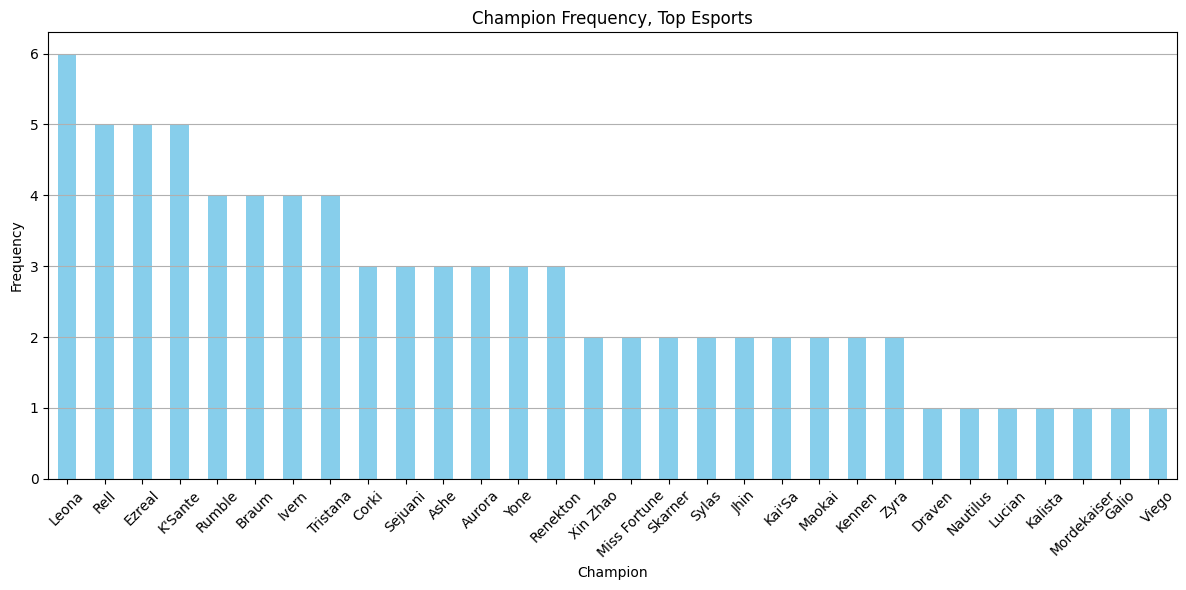

In [22]:
import matplotlib.pyplot as plt;

# A plot showing the champions drafted by a specific LoL esports team by frequency. From this, we can see what the most common champions are for this specific team to understand their draft preferences.
plt.figure(figsize=(12, 6))
frequency.plot(kind='bar', color='skyblue')
plt.title('Champion Frequency, Top Esports')
plt.xlabel('Champion')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [23]:
cleaned_data

,gameid,league,year,split,playoffs,date,game,patch,participantid,side,...,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
0,LOLTMNT99_132542,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,1,Blue,...,207.0,1928.0,1127.0,3.0,4.0,4.0,1.0,1.0,1.0,3.0
1,LOLTMNT99_132542,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,2,Blue,...,154.0,2943.0,1955.0,0.0,5.0,11.0,1.0,2.0,3.0,2.0
2,LOLTMNT99_132542,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,3,Blue,...,190.0,660.0,2223.0,18.0,1.0,8.0,3.0,1.0,4.0,3.0
3,LOLTMNT99_132542,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,4,Blue,...,170.0,5016.0,2473.0,64.0,8.0,7.0,1.0,1.0,4.0,5.0
4,LOLTMNT99_132542,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,5,Blue,...,31.0,2194.0,3049.0,-6.0,2.0,17.0,1.0,2.0,2.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97591,LOLTMNT02_181861,HW,2024,NaN,0,2024-11-03 21:08:36,5,14.18,8,Red,...,200.0,716.0,2609.0,14.0,1.0,6.0,0.0,1.0,2.0,3.0
97592,LOLTMNT02_181861,HW,2024,NaN,0,2024-11-03 21:08:36,5,14.18,9,Red,...,264.0,-445.0,1274.0,-28.0,1.0,5.0,0.0,1.0,2.0,0.0
97593,LOLTMNT02_181861,HW,2024,NaN,0,2024-11-03 21:08:36,5,14.18,10,Red,...,36.0,151.0,1043.0,8.0,1.0,5.0,2.0,0.0,3.0,1.0
97594,LOLTMNT02_181861,HW,2024,NaN,0,2024-11-03 21:08:36,5,14.18,100,Blue,...,862.0,-2295.0,-7637.0,8.0,4.0,9.0,9.0,9.0,23.0,4.0


In [24]:
# look at the list of available leagues
leagues_list = set(cleaned_data['league'])
leagues_list

{'AL',
 'CBLOL',
 'CBLOLA',
 'CDF',
 'CT',
 'EBL',
 'EBLPA',
 'EM',
 'EPL',
 'ESLOL',
 'EWC',
 'GLL',
 'GLLPA',
 'HC',
 'HM',
 'HW',
 'IC',
 'LAS',
 'LCK',
 'LCKC',
 'LCO',
 'LCS',
 'LEC',
 'LFL',
 'LFL2',
 'LIT',
 'LJL',
 'LLA',
 'LPLOL',
 'LRN',
 'LRS',
 'LVP SL',
 'NACL',
 'NEXO',
 'NLC',
 'NLC Aurora Open',
 'PCS',
 'PRM',
 'PRMP',
 'TCL',
 'TSC',
 'UL',
 'USP',
 'VCS',
 'WLDs'}

In [25]:
# filter by Worlds event, which is WLD's as we can surmise from looking at the data
worlds_data = cleaned_data[cleaned_data['league'] == 'WLDs']
worlds_data

,gameid,league,year,split,playoffs,date,game,patch,participantid,side,...,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
86256,LOLTMNT03_146711,WLDs,2024,NaN,0,2024-09-12 08:07:23,1,14.16,1,Blue,...,143.0,824.0,-210.0,24.0,3.0,0.0,3.0,1.0,4.0,2.0
86257,LOLTMNT03_146711,WLDs,2024,NaN,0,2024-09-12 08:07:23,1,14.16,2,Blue,...,146.0,968.0,2146.0,36.0,1.0,3.0,2.0,0.0,7.0,0.0
86258,LOLTMNT03_146711,WLDs,2024,NaN,0,2024-09-12 08:07:23,1,14.16,3,Blue,...,281.0,-1648.0,-1133.0,-47.0,1.0,2.0,2.0,5.0,0.0,0.0
86259,LOLTMNT03_146711,WLDs,2024,NaN,0,2024-09-12 08:07:23,1,14.16,4,Blue,...,247.0,230.0,1166.0,30.0,0.0,0.0,2.0,2.0,5.0,1.0
86260,LOLTMNT03_146711,WLDs,2024,NaN,0,2024-09-12 08:07:23,1,14.16,5,Blue,...,36.0,191.0,838.0,-5.0,0.0,3.0,0.0,1.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97387,LOLTMNT05_90307,WLDs,2024,NaN,0,2024-11-02 17:53:48,5,14.18,8,Red,...,259.0,-1408.0,564.0,-14.0,1.0,0.0,1.0,3.0,0.0,0.0
97388,LOLTMNT05_90307,WLDs,2024,NaN,0,2024-11-02 17:53:48,5,14.18,9,Red,...,250.0,892.0,-49.0,35.0,1.0,1.0,0.0,0.0,0.0,0.0
97389,LOLTMNT05_90307,WLDs,2024,NaN,0,2024-11-02 17:53:48,5,14.18,10,Red,...,37.0,230.0,-290.0,-8.0,0.0,2.0,1.0,0.0,2.0,2.0
97390,LOLTMNT05_90307,WLDs,2024,NaN,0,2024-11-02 17:53:48,5,14.18,100,Blue,...,967.0,-592.0,-846.0,-35.0,3.0,7.0,2.0,2.0,5.0,3.0


In [26]:
# all data related to ADC (Attack Damage Carry) role players at Worlds 2024
worlds_adc_data = worlds_data[worlds_data['position'] == 'bot']
worlds_adc_data

,gameid,league,year,split,playoffs,date,game,patch,participantid,side,...,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
86259,LOLTMNT03_146711,WLDs,2024,NaN,0,2024-09-12 08:07:23,1,14.16,4,Blue,...,247.0,230.0,1166.0,30.0,0.0,0.0,2.0,2.0,5.0,1.0
86264,LOLTMNT03_146711,WLDs,2024,NaN,0,2024-09-12 08:07:23,1,14.16,9,Red,...,277.0,-230.0,-1166.0,-30.0,2.0,5.0,1.0,0.0,0.0,2.0
86271,LOLTMNT03_146712,WLDs,2024,NaN,0,2024-09-12 09:12:13,2,14.16,4,Blue,...,278.0,-765.0,-1538.0,-32.0,0.0,6.0,0.0,1.0,3.0,0.0
86276,LOLTMNT03_146712,WLDs,2024,NaN,0,2024-09-12 09:12:13,2,14.16,9,Red,...,246.0,765.0,1538.0,32.0,1.0,3.0,0.0,0.0,6.0,0.0
86283,LOLTMNT03_146714,WLDs,2024,NaN,0,2024-09-12 10:08:20,3,14.16,4,Blue,...,279.0,406.0,-421.0,7.0,3.0,1.0,1.0,3.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97364,LOLTMNT05_90306,WLDs,2024,NaN,0,2024-11-02 16:14:54,3,14.18,9,Red,...,219.0,-2051.0,-481.0,48.0,1.0,0.0,1.0,3.0,3.0,0.0
97371,LOLTMNT05_91214,WLDs,2024,NaN,0,2024-11-02 17:01:42,4,14.18,4,Blue,...,204.0,1577.0,125.0,29.0,2.0,4.0,1.0,2.0,2.0,3.0
97376,LOLTMNT05_91214,WLDs,2024,NaN,0,2024-11-02 17:01:42,4,14.18,9,Red,...,233.0,-1577.0,-125.0,-29.0,2.0,2.0,3.0,2.0,4.0,1.0
97383,LOLTMNT05_90307,WLDs,2024,NaN,0,2024-11-02 17:53:48,5,14.18,4,Blue,...,285.0,-892.0,49.0,-35.0,0.0,0.0,0.0,1.0,1.0,0.0


In [27]:
# drop missing data
worlds_adc_data_clean = worlds_adc_data.dropna(axis=1)
worlds_adc_data_clean

,gameid,league,year,playoffs,date,game,patch,participantid,side,position,...,opp_csat20,golddiffat20,xpdiffat20,csdiffat20,killsat20,assistsat20,deathsat20,opp_killsat20,opp_assistsat20,opp_deathsat20
86259,LOLTMNT03_146711,WLDs,2024,0,2024-09-12 08:07:23,1,14.16,4,Blue,bot,...,202.0,-417.0,-174.0,16.0,0.0,0.0,2.0,2.0,5.0,1.0
86264,LOLTMNT03_146711,WLDs,2024,0,2024-09-12 08:07:23,1,14.16,9,Red,bot,...,218.0,417.0,174.0,-16.0,2.0,5.0,1.0,0.0,0.0,2.0
86271,LOLTMNT03_146712,WLDs,2024,0,2024-09-12 09:12:13,2,14.16,4,Blue,bot,...,217.0,-505.0,-2333.0,-34.0,0.0,2.0,0.0,0.0,1.0,0.0
86276,LOLTMNT03_146712,WLDs,2024,0,2024-09-12 09:12:13,2,14.16,9,Red,bot,...,183.0,505.0,2333.0,34.0,0.0,1.0,0.0,0.0,2.0,0.0
86283,LOLTMNT03_146714,WLDs,2024,0,2024-09-12 10:08:20,3,14.16,4,Blue,bot,...,220.0,224.0,-565.0,-1.0,1.0,1.0,1.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97364,LOLTMNT05_90306,WLDs,2024,0,2024-11-02 16:14:54,3,14.18,9,Red,bot,...,182.0,-746.0,833.0,30.0,1.0,0.0,0.0,1.0,2.0,0.0
97371,LOLTMNT05_91214,WLDs,2024,0,2024-11-02 17:01:42,4,14.18,4,Blue,bot,...,179.0,91.0,-1141.0,5.0,1.0,1.0,1.0,2.0,1.0,2.0
97376,LOLTMNT05_91214,WLDs,2024,0,2024-11-02 17:01:42,4,14.18,9,Red,bot,...,184.0,-91.0,1141.0,-5.0,2.0,1.0,2.0,1.0,1.0,1.0
97383,LOLTMNT05_90307,WLDs,2024,0,2024-11-02 17:53:48,5,14.18,4,Blue,bot,...,215.0,-1019.0,434.0,-31.0,0.0,0.0,0.0,1.0,1.0,0.0


In [28]:
# calculate KD (kills-to-death ratio) per adc player at worlds
adc_kd = (
    worlds_adc_data_clean
    .groupby('playername')
    .agg(kills=('kills', 'sum'), deaths=('deaths', 'sum'))
    .assign(kd=lambda x: (x['kills'] / x['deaths']).round(2))
    .reset_index()
)

adc_kd

,playername,kills,deaths,kd
0,Aiming,65,23,2.83
1,Betty,60,20,3.00
2,Ceo,39,24,1.62
3,Deft,36,14,2.57
4,EasyLove,46,25,1.84
...,...,...,...,...
17,Supa,56,28,2.00
18,TitaN,40,28,1.43
19,Tomo,32,19,1.68
20,Viper,67,30,2.23


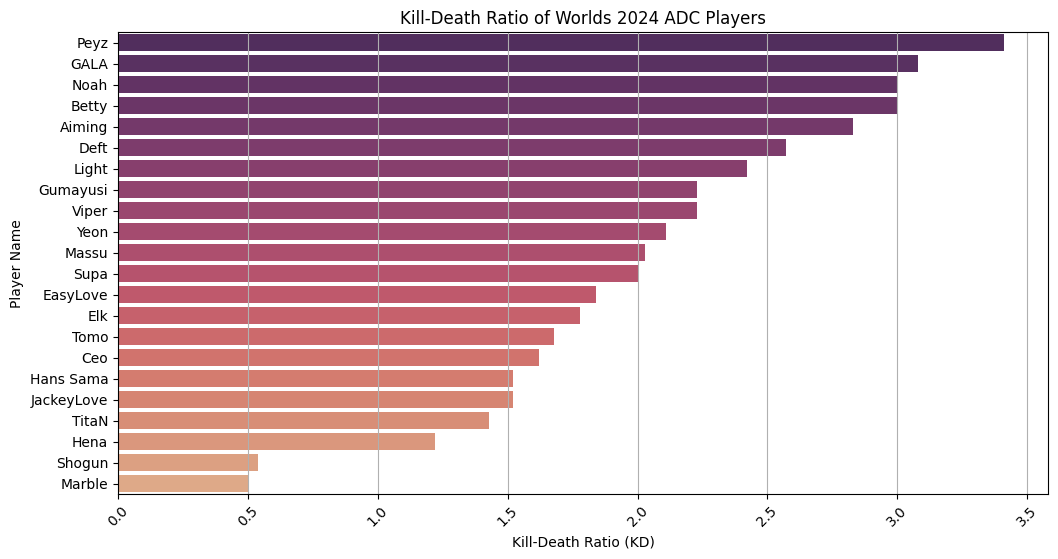

In [29]:
import seaborn as sns

adc_kd_sorted = adc_kd.sort_values(by='kd', ascending=False)

# Bar plot showing ADC role players ranked by their kill-death ratios. We can use this to estimate who the best performing players are 
plt.figure(figsize=(12, 6))
sns.barplot(data=adc_kd_sorted, x='kd', y='playername', palette=sns.color_palette("flare", n_colors=len(adc_kd_sorted))[::-1], hue='playername')
plt.title('Kill-Death Ratio of Worlds 2024 ADC Players')
plt.xlabel('Kill-Death Ratio (KD)')
plt.ylabel('Player Name')
plt.xticks(rotation=45)
plt.grid(axis='x')
plt.show()

In [30]:
# Creep Score Per Minute for each ADC at worlds
adc_cs = worlds_adc_data_clean.groupby('playername')['cspm'].mean().reset_index().round(2)

adc_cs

,playername,cspm
0,Aiming,10.18
1,Betty,9.85
2,Ceo,8.53
3,Deft,9.96
4,EasyLove,9.42
...,...,...
17,Supa,9.62
18,TitaN,9.66
19,Tomo,9.31
20,Viper,10.48


In [31]:
# merge the kd and cs info per player 
adc_kd_cs = pd.merge(adc_kd, adc_cs, on='playername')
adc_kd_cs

,playername,kills,deaths,kd,cspm
0,Aiming,65,23,2.83,10.18
1,Betty,60,20,3.00,9.85
2,Ceo,39,24,1.62,8.53
3,Deft,36,14,2.57,9.96
4,EasyLove,46,25,1.84,9.42
...,...,...,...,...,...
17,Supa,56,28,2.00,9.62
18,TitaN,40,28,1.43,9.66
19,Tomo,32,19,1.68,9.31
20,Viper,67,30,2.23,10.48


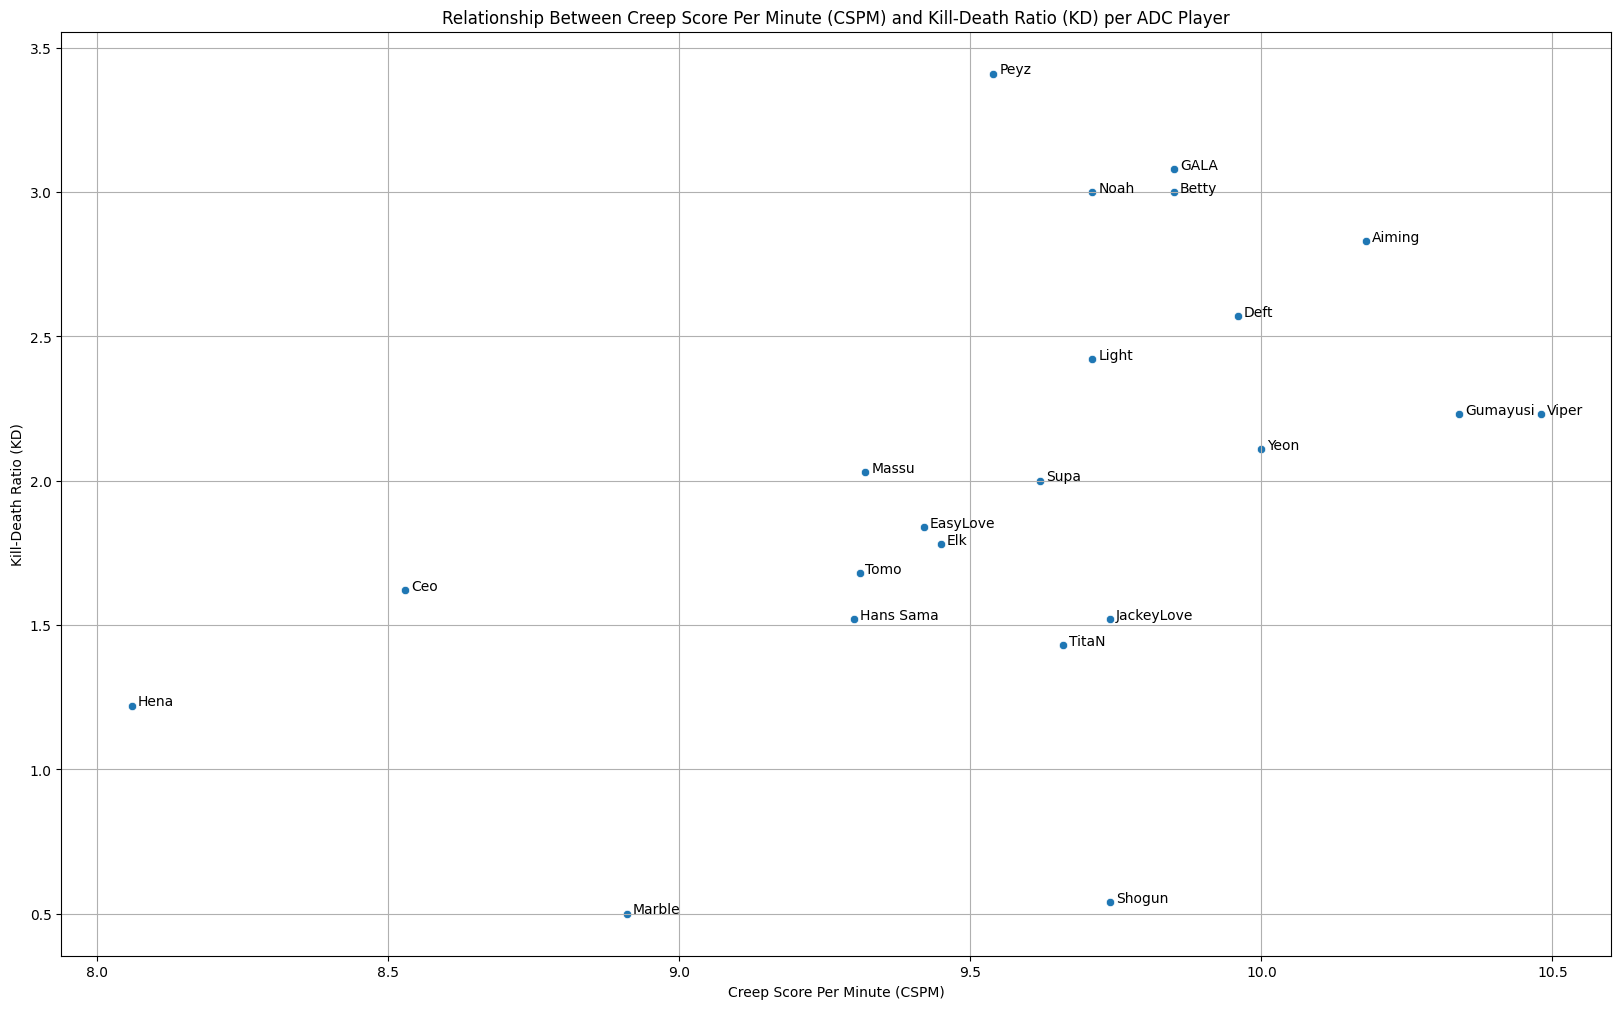

In [32]:
# create a scatter plot for CSPM vs. KD
plt.figure(figsize=(20, 12))
scatter = sns.scatterplot(data=adc_kd_cs, x='cspm', y='kd')

# annotate each point with the player name
for line in adc_kd_cs.itertuples():
    scatter.text(line.cspm + 0.01, line.kd, line.playername, horizontalalignment='left', size='medium', color='black')
    plt.title('Relationship Between Creep Score Per Minute (CSPM) and Kill-Death Ratio (KD) per ADC Player')
plt.xlabel('Creep Score Per Minute (CSPM)')
plt.ylabel('Kill-Death Ratio (KD)')
plt.grid(True)
plt.show()



In [33]:
# lets do this for all players across all Tier 1 games, not just worlds ADC's. for this, lets first define what tournament names are tier 1
tier1events = ['LCK', 'LPL', 'LEC', 'LCS', 'EWC', 'WLDs', 'MSI'] # official Riot Games Definition of Tier 1 events.
leagues_list

{'AL',
 'CBLOL',
 'CBLOLA',
 'CDF',
 'CT',
 'EBL',
 'EBLPA',
 'EM',
 'EPL',
 'ESLOL',
 'EWC',
 'GLL',
 'GLLPA',
 'HC',
 'HM',
 'HW',
 'IC',
 'LAS',
 'LCK',
 'LCKC',
 'LCO',
 'LCS',
 'LEC',
 'LFL',
 'LFL2',
 'LIT',
 'LJL',
 'LLA',
 'LPLOL',
 'LRN',
 'LRS',
 'LVP SL',
 'NACL',
 'NEXO',
 'NLC',
 'NLC Aurora Open',
 'PCS',
 'PRM',
 'PRMP',
 'TCL',
 'TSC',
 'UL',
 'USP',
 'VCS',
 'WLDs'}

In [34]:
# if we look at our leagues list, we can't see the tier 1 event named MSI. lets check the full events list even with partial data to see if we can find MSI
full_leagues_list = set(all_data['league'])
full_leagues_list

{'AL',
 'CBLOL',
 'CBLOLA',
 'CDF',
 'CT',
 'DCup',
 'EBL',
 'EBLPA',
 'EM',
 'EPL',
 'ESLOL',
 'EWC',
 'GLL',
 'GLLPA',
 'HC',
 'HM',
 'HW',
 'IC',
 'LAS',
 'LCK',
 'LCKC',
 'LCO',
 'LCS',
 'LDL',
 'LEC',
 'LFL',
 'LFL2',
 'LIT',
 'LJL',
 'LLA',
 'LPL',
 'LPLOL',
 'LRN',
 'LRS',
 'LVP SL',
 'MSI',
 'NACL',
 'NEXO',
 'NLC',
 'NLC Aurora Open',
 'PCS',
 'PRM',
 'PRMP',
 'TCL',
 'TSC',
 'UL',
 'USP',
 'VCS',
 'WLDs'}

In [35]:
# we can see that MSI is there. lets see if MSI has the values we need: playernames, kills, deaths, cspm
msi_data = all_data[all_data['league'] == 'MSI']
msi_data

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
47712,11038-11038_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=11038,MSI,2024,NaN,0,2024-05-01 08:16:45,1,14.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47713,11038-11038_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=11038,MSI,2024,NaN,0,2024-05-01 08:16:45,1,14.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47714,11038-11038_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=11038,MSI,2024,NaN,0,2024-05-01 08:16:45,1,14.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47715,11038-11038_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=11038,MSI,2024,NaN,0,2024-05-01 08:16:45,1,14.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47716,11038-11038_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=11038,MSI,2024,NaN,0,2024-05-01 08:16:45,1,14.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51115,11061-11061_game_4,partial,https://lpl.qq.com/es/stats.shtml?bmid=11061,MSI,2024,NaN,0,2024-05-19 12:09:53,4,14.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51116,11061-11061_game_4,partial,https://lpl.qq.com/es/stats.shtml?bmid=11061,MSI,2024,NaN,0,2024-05-19 12:09:53,4,14.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51117,11061-11061_game_4,partial,https://lpl.qq.com/es/stats.shtml?bmid=11061,MSI,2024,NaN,0,2024-05-19 12:09:53,4,14.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51118,11061-11061_game_4,partial,https://lpl.qq.com/es/stats.shtml?bmid=11061,MSI,2024,NaN,0,2024-05-19 12:09:53,4,14.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# scrolling through the data, we can see that our parameters exist within msi. this means all of the tier 1 leagues can be used
tier1_data = all_data[all_data['league'].isin(tier1events)]
tier1_data

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
708,LOLTMNT06_13630,complete,NaN,LEC,2024,Winter,0,2024-01-13 16:10:20,1,14.01,...,230.0,940.0,-1286.0,-9.0,3.0,2.0,2.0,2.0,1.0,3.0
709,LOLTMNT06_13630,complete,NaN,LEC,2024,Winter,0,2024-01-13 16:10:20,1,14.01,...,151.0,320.0,1483.0,39.0,2.0,2.0,0.0,2.0,4.0,1.0
710,LOLTMNT06_13630,complete,NaN,LEC,2024,Winter,0,2024-01-13 16:10:20,1,14.01,...,256.0,-453.0,-3524.0,-54.0,2.0,1.0,1.0,0.0,3.0,0.0
711,LOLTMNT06_13630,complete,NaN,LEC,2024,Winter,0,2024-01-13 16:10:20,1,14.01,...,223.0,55.0,1091.0,32.0,2.0,2.0,2.0,3.0,1.0,2.0
712,LOLTMNT06_13630,complete,NaN,LEC,2024,Winter,0,2024-01-13 16:10:20,1,14.01,...,39.0,325.0,-316.0,-3.0,0.0,3.0,2.0,0.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114079,LOLTMNT05_90307,complete,NaN,WLDs,2024,NaN,0,2024-11-02 17:53:48,5,14.18,...,259.0,-1408.0,564.0,-14.0,1.0,0.0,1.0,3.0,0.0,0.0
114080,LOLTMNT05_90307,complete,NaN,WLDs,2024,NaN,0,2024-11-02 17:53:48,5,14.18,...,250.0,892.0,-49.0,35.0,1.0,1.0,0.0,0.0,0.0,0.0
114081,LOLTMNT05_90307,complete,NaN,WLDs,2024,NaN,0,2024-11-02 17:53:48,5,14.18,...,37.0,230.0,-290.0,-8.0,0.0,2.0,1.0,0.0,2.0,2.0
114082,LOLTMNT05_90307,complete,NaN,WLDs,2024,NaN,0,2024-11-02 17:53:48,5,14.18,...,967.0,-592.0,-846.0,-35.0,3.0,7.0,2.0,2.0,5.0,3.0


In [37]:
# create a df that stores the necessary values for each player
player_kd_cs = (
    tier1_data.groupby('playername')
    .agg({'kills' : 'sum', 'deaths' : 'sum', 'cspm' : 'mean'})
    .reset_index()
)

player_kd_cs

,playername,kills,deaths,cspm
0,0909,11,11,8.249500
1,1xn,269,162,9.241224
2,369,379,302,8.307413
3,APA,377,226,9.178534
4,Able,164,132,9.301712
...,...,...,...,...
334,tinowns,16,12,9.304820
335,ucal,307,151,9.128032
336,vital,7,38,1.266318
337,xiaofang,177,149,6.149673


In [38]:
player_kd_cs['kd'] = (player_kd_cs['kills'] / player_kd_cs['deaths']).round(2)
player_kd_cs

,playername,kills,deaths,cspm,kd
0,0909,11,11,8.249500,1.00
1,1xn,269,162,9.241224,1.66
2,369,379,302,8.307413,1.25
3,APA,377,226,9.178534,1.67
4,Able,164,132,9.301712,1.24
...,...,...,...,...,...
334,tinowns,16,12,9.304820,1.33
335,ucal,307,151,9.128032,2.03
336,vital,7,38,1.266318,0.18
337,xiaofang,177,149,6.149673,1.19


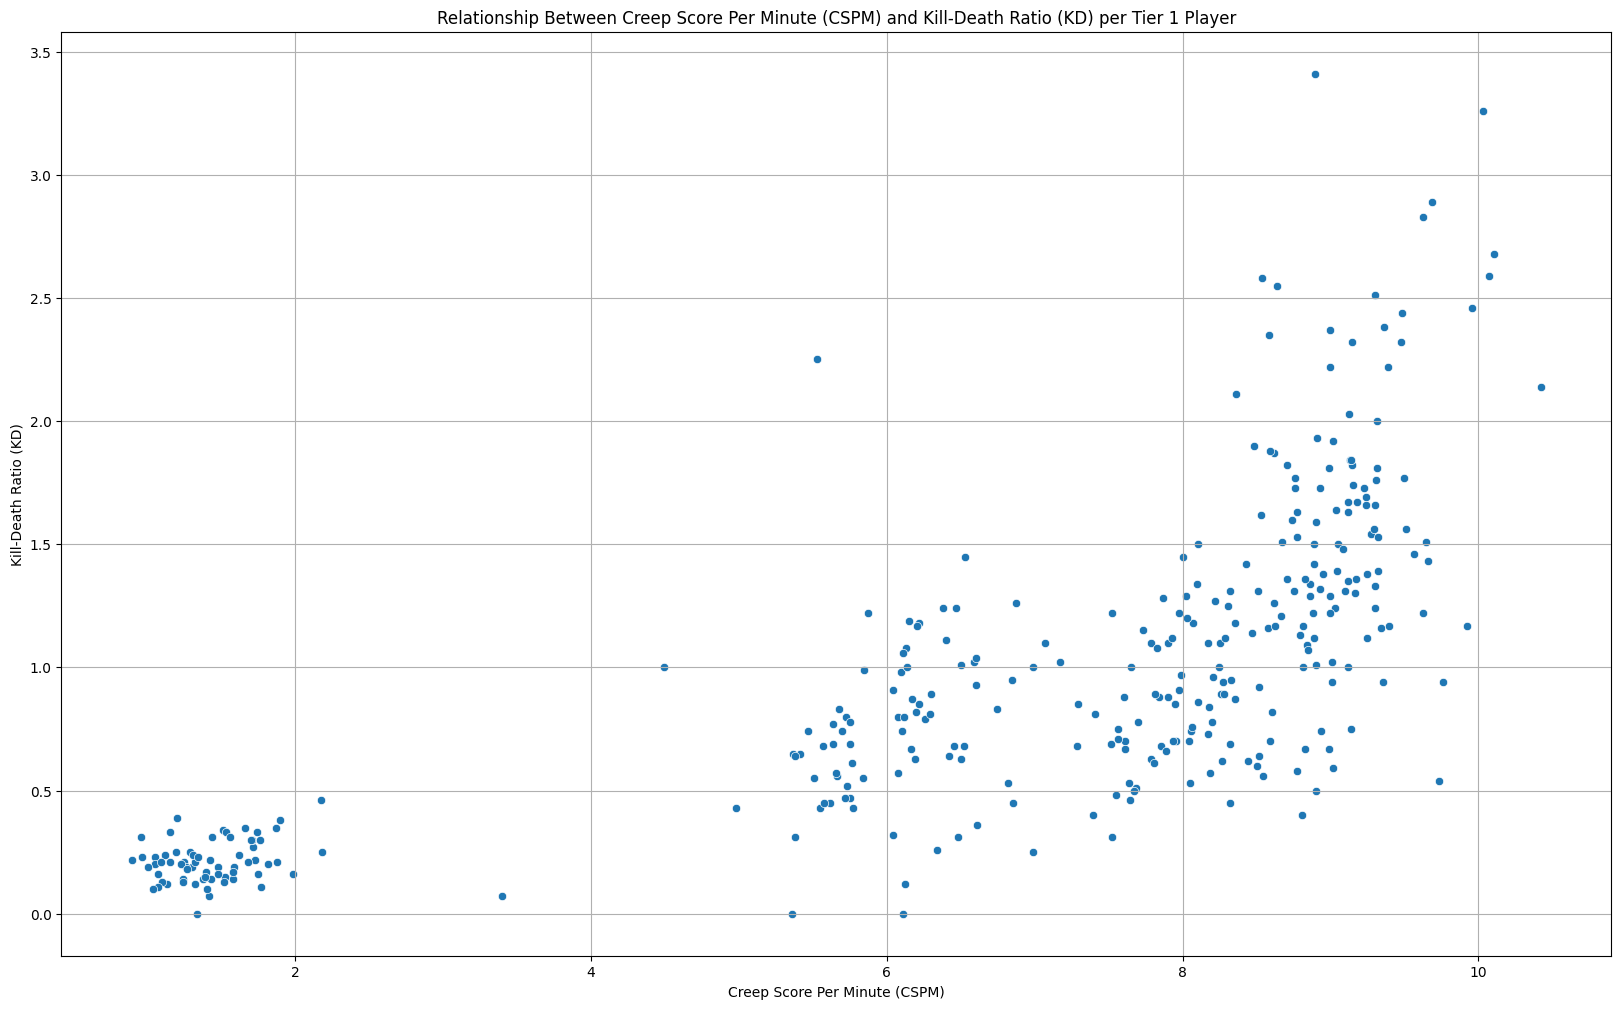

In [39]:
# create a scatter plot for CSPM vs. KD
plt.figure(figsize=(20, 12))
scatter = sns.scatterplot(data=player_kd_cs, x='cspm', y='kd')

for line in adc_kd_cs.itertuples():
    plt.title('Relationship Between Creep Score Per Minute (CSPM) and Kill-Death Ratio (KD) per Tier 1 Player')
plt.xlabel('Creep Score Per Minute (CSPM)')
plt.ylabel('Kill-Death Ratio (KD)')
plt.grid(True)
plt.show()



In [40]:
# analyzing the graph, we can see there is a definite positive correlation between KD and CSPM.

## Through analyzing this dataset, two questions I have thought of that I would like to answer are:
### Who are the best performing Tier 1 players? 
To answer this, I will need to find a way to rank players by some combination of criteria. This will require more analysis of the dataset, as well as research into what constitutes a good ranking metric.
### Which Tier 1 team has the largest flexibility in drafts?
To answer this, I will have to define what exactly defines flexibility in draft: is it the number of champions played? How adept every player is over a range of champions? This will require more research into drafting as well as performance ranking